# Mathematical Foundations of Machine Learning

The primary goal of this project was to delve into the foundational mathematics underpinning
<a href="#">Machine Learning and Data Science </a> and elucidate their interconnection. To achieve this, I undertook the following steps: 

### 1 . <code>Identify Special Matrices</code>

Identifying singular matrices is essential for ensuring the
              correctness and stability of algorithms and computations in both
              linear algebra and machine learning. It enables practitioners to
              handle various mathematical operations effectively and to develop
              robust machine-learning models.

```python
A[0, 0]  A[0, 1]  A[0, 2]  A[0, 3]
A[1, 0]  A[1, 1]  A[1, 2]  A[1, 3]
A[2, 0]  A[2, 1]  A[2, 2]  A[2, 3]
A[3, 0]  A[3, 1]  A[3, 2]  A[3, 3]
```

In [1]:
import numpy as np

In [2]:
def isSingular(A):
    B = np.array(A, dtype=np.float_) 
    try:
        fixRowZero(B)
        fixRowOne(B)
        fixRowTwo(B)
        fixRowThree(B)
    except MatrixIsSingular:
        return True
    return False


# defining error flag. For when things go wrong if the matrix is singular.
class MatrixIsSingular(Exception): pass


def fixRowZero(A):
    if A[0, 0] == 0:
        A[0] = A[0] + A[1]
    if A[0, 0] == 0:
        A[0] = A[0] + A[2]
    if A[0, 0] == 0:
        A[0] = A[0] + A[3]
    if A[0, 0] == 0:
        raise MatrixIsSingular()
    A[0] = A[0] / A[0, 0]
    return A


def fixRowOne(A):
    A[1] = A[1] - A[1, 0] * A[0]
    if A[1, 1] == 0:
        A[1] = A[1] + A[2]
        A[1] = A[1] - A[1, 0] * A[0]
    if A[1, 1] == 0:
        A[1] = A[1] + A[3]
        A[1] = A[1] - A[1, 0] * A[0]
    if A[1, 1] == 0:
        raise MatrixIsSingular()
    A[1] = A[1] / A[1, 1]
    return A


def fixRowTwo(A):
    A[2] = A[2] - A[2, 0] * A[0]
    A[2] = A[2] - A[2, 1] * A[1]
    # testing that the diagonal element is not zero.
    if A[2, 2] == 0:
        A[2] = A[2] + A[3]
        A[2] = A[2] - A[2, 0] * A[0]
        A[2] = A[2] - A[2, 1] * A[1]
    if A[2, 2] == 0:
        raise MatrixIsSingular()
    # setting the diagonal element to one
    A[2] = A[2] / A[2, 2]
    return A


def fixRowThree(A):
    # setting the sub-diagonal elements of row three to zero.
    A[3] = A[3] - A[3, 0] * A[0]
    A[3] = A[3] - A[3, 1] * A[1]
    A[3] = A[3] - A[3, 2] * A[2]
    # testing if the diagonal element is zero.
    if A[3, 3] == 0:
        raise MatrixIsSingular()
    # Transforming the row to set the diagonal element to one.
    A[3] = A[3] / A[3, 3]
    return A

<code> Testing code </code>

In [3]:
A = np.array([
        [2, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 0, 4, 4],
        [0, 0, 5, 5]
    ], dtype=np.float_)
isSingular(A)

True

In [4]:
A = np.array([
        [0, 7, -5, 3],
        [2, 8, 0, 4],
        [3, 12, 0, 5],
        [1, 3, 1, 3]
    ], dtype=np.float_)
fixRowZero(A)

array([[ 1. ,  7.5, -2.5,  3.5],
       [ 2. ,  8. ,  0. ,  4. ],
       [ 3. , 12. ,  0. ,  5. ],
       [ 1. ,  3. ,  1. ,  3. ]])

In [5]:
fixRowOne(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 3.        , 12.        ,  0.        ,  5.        ],
       [ 1.        ,  3.        ,  1.        ,  3.        ]])

In [6]:
fixRowTwo(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 0.        ,  0.        ,  1.        ,  1.5       ],
       [ 1.        ,  3.        ,  1.        ,  3.        ]])

In [7]:
fixRowThree(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 0.        ,  0.        ,  1.        ,  1.5       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

### 2. <code>Gram-Schmidt process</code>

The Gram-Schmidt process plays a crucial role in both theoretical aspects of linear algebra and practical applications in machine learning, where it is used to manipulate and analyze high-dimensional data effectively. It enables researchers and
practitioners to extract meaningful information from complex datasets and build robust machine-learning models.

![The first two steps of the Gram–Schmidt process](../images/525px-Gram–Schmidt_process.svg.png)
![The modified Gram-Schmidt process](../images/Gram-Schmidt_orthonormalization_process.gif)

In [8]:
import numpy as np
import numpy.linalg as la

In [9]:
verySmallNumber = 1e-14

# performing the Gram-Schmidt procedure for 4 basis vectors.
def gsBasis4(A) :
    B = np.array(A, dtype=np.float_) 
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    # Subtracting any overlap with the new zeroth vector.
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
    if la.norm(B[:, 1]) > verySmallNumber :
        B[:, 1] = B[:, 1] / la.norm(B[:, 1])
    else :
        B[:, 1] = np.zeros_like(B[:, 1])
    # repeating the process for column 2.
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 0] * B[:, 0] - B[:,2]@B[:,1]*B[:,1]
    
    if la.norm(B[:, 2]) > verySmallNumber :
        B[:, 2] = B[:, 2] / la.norm(B[:, 2])
    else :
        B[:, 2] = np.zeros_like(B[:, 2])
    
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 0] * B[:, 0] - B[:,3]@B[:,1]*B[:,1] - B[:,3]@B[:,2]*B[:,2]
    
    # normalising if possible
    if la.norm(B[:, 3]) > verySmallNumber :
        B[:, 3] = B[:, 3] / la.norm(B[:, 3])
    else :
        B[:, 3] = np.zeros_like(B[:, 3])    
    return B

# generalizing the procedure.
def gsBasis(A) :
    B = np.array(A, dtype=np.float_) 
    for i in range(B.shape[1]) :
        for j in range(i) :
            # subtracting the overlap with previous vectors.
            B[:, i] = B[:,i] - B[:,i]@B[:,j]*B[:,j]
        # normalisation test for B[:, i]
        if la.norm(B[:, i]) > verySmallNumber :
                B[:, i] = B[:, i] / la.norm(B[:, i])
        else :
            B[:, i] = np.zeros_like(B[:, i])                
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(la.norm(gsBasis(A), axis=0))

<code>Testing the code</code>

In [10]:
V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)
gsBasis4(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [11]:
# Once I've done Gram-Schmidt once,
# doing it again should give me the same result. Testing this:
U = gsBasis4(V)
gsBasis4(U)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [12]:
# general function.
gsBasis(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [13]:
# non-square matrices
A = np.array([[3,2,3],
              [2,5,-1],
              [2,4,8],
              [12,2,1]], dtype=np.float_)
gsBasis(A)

array([[ 0.23643312,  0.18771349,  0.22132104],
       [ 0.15762208,  0.74769023, -0.64395812],
       [ 0.15762208,  0.57790444,  0.72904263],
       [ 0.94573249, -0.26786082, -0.06951101]])

In [14]:
dimensions(A)

3.0

In [15]:
B = np.array([[6,2,1,7,5],
              [2,8,5,-4,1],
              [1,-6,3,2,8]], dtype=np.float_)
gsBasis(B)

array([[ 0.93704257, -0.12700832, -0.32530002,  0.        ,  0.        ],
       [ 0.31234752,  0.72140727,  0.61807005,  0.        ,  0.        ],
       [ 0.15617376, -0.6807646 ,  0.71566005,  0.        ,  0.        ]])

In [16]:
dimensions(B)

3.0

In [17]:
# testing the one vector that is a linear combination of the others.
C = np.array([[1,0,2],
              [0,1,-3],
              [1,0,2]], dtype=np.float_)
gsBasis(C)

array([[0.70710678, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.70710678, 0.        , 0.        ]])

In [18]:
dimensions(C)

2.0

### 3. <code>Construct a reflection matrix</code>

By writing a function to construct a reflection matrix for arbitrary mirror angles, we enable applications in various fields,
including computer graphics, computer vision, robotics, and geometric modeling. This capability allows us to perform geometric
transformations accurately and efficiently, contributing to the development of advanced algorithms and applications in these
domains.

In [60]:
import numpy as np
from numpy.linalg import norm, inv
from numpy import transpose
from readonly.bearNecessities import *

function to generate a transformation matrix for reflecting vectors in an arbitrarily angled mirror. This involves transforming a matrix representing the mirror's orthonormal basis to Bear's coordinate system, performing the reflection operation, and then transforming it back to the mirror's basis.

In [ ]:
# Function to return the transformation matrix T,
def build_reflection_matrix(bearBasis) : # The parameter bearBasis is a 2×2 matrix that is passed to the function.
    E = gsBasis(bearBasis)
    TE = np.array([[1, 0],
                   [0, -1]])
    # Combining the matrices E and TE to produce the transformation matrix.
    T = E@TE@transpose(E)
    return T

<code> Testing </code>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# matrix of Bear's basis vectors.
bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])
# building a transformation matrix.
T = build_reflection_matrix(bearBasis)

reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

# code to set up the graphics environment.
ax = draw_mirror(bearBasis)

# ploting Bear, his white fur, his black fur, and his face.
ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

# ploting Bear's reflection.
ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);


### 4. <code>Develop a function to calculate PageRank</code>

By developing a function to calculate PageRank, we enable
              applications in web search, recommendation systems, and network
              analysis, contributing to the advancement of information retrieval
              and machine learning technologies. The ability to analyze
              large-scale networks and extract meaningful insights from them is
              essential in various fields, including internet technologies,
              social media analytics, and e-commerce platforms.

![PageRank](../images/PageRanks-Example.svg.png)
![PageRank](../images/PageRanks-Example.svg.png)

The task involves developing a function to calculate the PageRank for an arbitrarily large probability matrix using the power iteration method. This function computes the principal eigenvector of the damped system, where the damping parameter **d** is defined within the function. The input to the function is the link matrix, representing the connectivity of web pages, and the damping parameter **d**.

In [62]:
# Before we begin, let's load the libraries.
%pylab notebook
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<code>Case of Study</code>:
A micro-internet, with just 6 websites (**A**vocado, **B**ullseye, **C**atBabel, **D**romeda, **e**Tings, and **F**aceSpace). Each website links to some of the others, and this forms a network as shown,

![A Micro-Internet](../images/internet.png/)

In this case scenario, I have 100 *Procrastinating Pat*s on my micro-internet, each viewing a single website at a time.
* Each minute the Pats follow a link on their website to another site on the micro-internet.
* After a while, the websites that are most linked to will have more Pats visiting them, and 
* in the long run, each minute for every Pat that leaves a website, another will enter keeping the total numbers of Pats on each website constant.
The PageRank is simply the ranking of websites by how many Pats they have on them at the end of this process.

I represent the number of Pats on each website with the vector,
$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$
And say that the number of Pats on each website in minute $i+1$ is related to those at minute $i$ by the matrix transformation

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
with the matrix $L$ taking the form,
$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$
where the columns represent the probability of leaving a website for any other website, and sum to one.
The rows determine how likely I am to enter a website from any other, though these need not add to one.
The long time behaviour of this system is when $ \mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, so I'll drop the superscripts here, and that allows me to write,
$$ L \,\mathbf{r} = \mathbf{r}$$

which is an eigenvalue equation for the matrix $L$, with eigenvalue 1 (this is guaranteed by the probabalistic structure of the matrix $L$).

In [63]:
# probability of clicking a link to each website when leaving Website F (FaceSpace).
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

I only care about the principal eigenvector (the one with the largest eigenvalue, which will be 1 in this case), I'll use the *power iteration method* which will scale better, and is faster for large systems.

In [64]:
# peeking at the PageRank for this micro-internet.
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100 Procrastinating Pats

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

👆🏽💡
* From the list we see the number of Procrastinating Pats that we expect to find on each website after long times.
* In order of *popularity* (based on this metric), the PageRank of this micro-internet is:

**C**atBabel, **D**romeda, **A**vocado, **F**aceSpace, **B**ullseye, **e**Tings


<code>Using the Power-Iteration method</code> - This method will be much better at dealing with large systems.

In [65]:
r = 100 * np.ones(6) / 6 # Seting up this vector (6 entries of 1/6 × 100 each)
r 

array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667])

In [66]:
r = L @ r # Applying matrix L to r
r 

array([13.88888889, 13.88888889, 38.88888889, 27.77777778,  0.        ,
        5.55555556])

Automation applying this matrix multiple times as follows,

In [67]:
r = 100 * np.ones(6) / 6 # Seting up this vector (6 entries of 1/6 × 100 each)
for i in np.arange(100) : # Repeating 100 times
    r = L @ r
r

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

running until  get to the required tolerance.

In [68]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])

The PageRank order is established fairly quickly, and the vector converges on the value we calculated earlier after a few tens of repeats.

<code>Damping Parameter</code>

In [69]:
# Building the new L matrix for the expanded micro-internet, 
# Using Power-Iteration on the Procrastinating Pat vector.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   0, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 0, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   1, 0 ],
               [0,   0,   0,   0, 0,   0, 1 ]])


The system I just studied above converged fairly quickly to the correct answer.
I will now consider an extension to the micro-internet where things start to go wrong.

Say a new website is added to the micro-internet: *Geoff's* Website.
This website is linked to by *FaceSpace* and only links to itself.
![An Expanded Micro-Internet](../Matemathics_ML/images/internet2.png "An Expanded Micro-Internet")

Intuitively, only *FaceSpace*, which is in the bottom half of the page rank, links to this website amongst the two others it links to, so I expect *Geoff's* site to have a correspondingly low PageRank score.

In [70]:
r = 100 * np.ones(7) / 7 # Setting up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

46 iterations to convergence.


array([ 0.01077429,  0.00420324,  0.02131321,  0.01251789,  0.        ,
       85.66547709, 14.28571429])

👆🏽💡 That's no good! *Geoff* seems to be taking all the traffic on the micro-internet, and somehow coming at the top of the PageRank.
This behaviour can be understood, because once a Pat get's to *Geoff's* Website, they can't leave, as all links head back to Geoff.

* To combat this, I will add a small probability that the Procrastinating Pats don't follow any link on a webpage, but instead visit a website on the micro-internet at random.

* I'll say the probability of them following a link is $d$ and the probability of choosing a random website is therefore $1-d$.


* Matrix to work out where the Pat's visit each minute.

$$ M = d \, L + \frac{1-d}{n} \, J $$
where $J$ is an $n\times n$ matrix where every element is one.

* If $d$ is one, we have the case we had previously, 
* whereas if $d$ is zero, we will always visit a random webpage and therefore all webpages will be equally likely and equally ranked.
For this extension to work best, $1-d$ should be somewhat small 

In [26]:
d = 0.5 
M = d * L2 + (1-d)/7 * np.ones([7, 7]) # np.ones() is the J matrix, with ones for each entry.

In [27]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([13.13619674, 11.11812027, 19.27885503, 14.33173875,  7.14285714,
       20.70651779, 14.28571429])

👆🏽💡 This is certainly better, the PageRank gives sensible numbers for the Procrastinating Pats that end up on each webpage.
* This method still predicts Geoff has a high ranking webpage however.
     * This could be seen as a consequence of using a small network. 

In [71]:
# function to provide the PageRank for an arbitrarily sized internet.
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (6 entries of 1/6 × 100 each)
    last = r
    r = M @ r
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r


<code> Testing  code </code>

In [89]:
def generate_internet(size):
    link_matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i == j:
                link_matrix[i, j] = 1
            elif j == size - 1 and i != j:
                link_matrix[i, j] = 1
    return link_matrix

def pageRank(linkMatrix, d):
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n  # Sets up this vector (6 entries of 1/6 × 100 each)
    return np.linalg.matrix_power(M, 1000) @ r


In [90]:
# function to generate internets of different sizes.
generate_internet(5)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

In [91]:
# Testing  PageRank method against the built in "eig" method.
L = generate_internet(100)

In [92]:
pageRank(L, 1)

array([1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
       1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001., 1001.,
          1.])

In [73]:
pageRank(L, 1)


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])

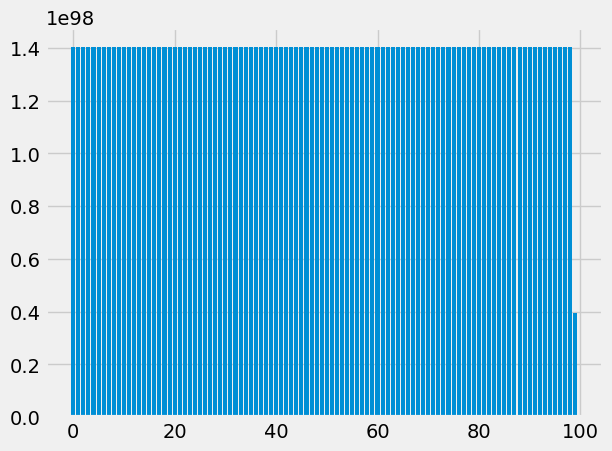

In [93]:
# PageRank graph.
%matplotlib inline
import matplotlib.pyplot as plt

r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);

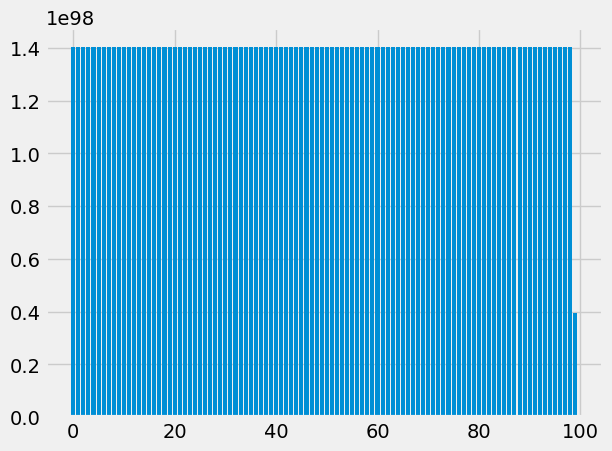

In [94]:
# PageRank graph.
%matplotlib inline
import matplotlib.pyplot as plt

r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);

In [74]:
eVals, eVecs = la.eig(L) # Getting the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Ordering them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

### 5. <code>Explor Different Scenarios in the Sandpit</code>

By exploring different scenarios in the sandpit and experimenting
              with optimization strategies, I developed problem-solving skills
              that are valuable in both optimization tasks and machine learning
              applications. Additionally, understanding the challenges posed by
              different scenarios in the sandpit helped me develop more robust
              optimization algorithms and strategies for tackling real-world
              problems.

The task involves helping the supervisor of a building site locate their mobile phone, which has fallen into a pit with an uneven floor covered by sand. The supervisor has crafted a 'dip-stick' to measure the slope of the floor at different points by clicking on them. The objective is to find the lowest point in the sandpit where the phone is located, using as few dips as possible.

In [95]:
%run "sandpit-exercises.ipynb"

ImportError: cannot import name 'imread' from 'scipy.misc' (C:\Users\mbeua\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\misc\__init__.py)

ImportError: cannot import name 'imread' from 'scipy.misc' (C:\Users\mbeua\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\misc\__init__.py)

ImportError: cannot import name 'imread' from 'scipy.misc' (C:\Users\mbeua\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\misc\__init__.py)

In [ ]:
%run "sandpit-exercises.ipynb"
sandpit_intro()

![S1](../images/s1.png)

<code>Depth Only</code>

Before trying the dip-stick that measures the Jacobian, the supervisor had contructed a dip-stick that can only measure the depth on each dip.

Without information about the Jacobian, I will try and find the supervisor's phone.

In [ ]:
%run "sandpit-exercises.ipynb"
sandpit_depth_only()

![S2](../images/s2.png)

<code>More Sandpits</code>

In a nearby building site, another phone has been dropped into a pit.
I will use the gradient dip-stick and help out the supervisor.

In [ ]:
%run "sandpit-exercises.ipynb"
sandpit_random()

![S3](../images/s3.png)

<code>Multiple Minima</code>

In this sandpit, there are many local minima that the supervisor's phone could have fallen into. The phone is in the deepest one - I will Try to find it!

In [ ]:
%run "sandpit-exercises.ipynb"
sandpit_multiple_minima()

![S4](../images/s4.png)

<code>Noisy Functions</code>

Before the sand was loaded into this next pit, the pit floor was covered with rocks. This means when the supervisor tries to measure the slope, the surface they measure is rough and can change quickly. I will try to find the phone in this situation.

In [ ]:
%run "sandpit-exercises.ipynb"
sandpit_rocks()

![S5](../images/s5.png)

<code>Narrow Wells</code>

In this pit, there is a deep but narrow well that the phone may have fallen into. I will try to find the phone in this case.

![S6](../images/s6.png)

### 5.1. <code>Gradient descent in a sandpit</code>

In [ ]:
def next_step(f, J, H) :
    return np.array([1, 0])

%run "sandpit-exercises.ipynb"
sandpit_gradient(next_step)

![S7](../images/s7.png)

<code>Steepest Descent</code>

Using the available information, namely the depth of the pit, the Jacobian, or the Hessian by moving in a direction proportional to the Jacobian, down the slope

In [32]:
def next_step(f, J, H) :
    gamma = 0.5
    return -gamma * J
%run "sandpit-exercises.ipynb"
sandpit_gradient(next_step)

Exception: File `'sandpit-exercises.ipynb'` not found.

![S8](../images/s8.png)

<code>Hessian</code>

The trouble with the previous method is it is not always clear how big to set 
**γ** to be. Too big, and the jumps are too big, missing all the features. Too small, and it will take too long to coverge.

I will just use the Hessian to determine the jump size automaticaly

In [ ]:
# this method is just as likely to find maxima as it is mimima.
def next_step(f, J, H) :
    return -linalg.inv(H) @ J
%run "sandpit-exercises.ipynb"
sandpit_gradient(next_step)

![S9](../images/s9.png)

The Hessian method finded the stationaty point step size too large, and can even change the direction up hill.

<code>Hybrid method</code>

I'll try a hybrid method which tries the Hessian unless the step would be too big, or it would point backwards, in which case it goes back to using steepest descent.

In [ ]:
def next_step(f, J, H) :
    gamma = 0.5
    step = -linalg.inv(H) @ J
    if step @ -J <= 0 or linalg.norm(step) > 2 :
        step = -gamma * J
    return step

# Click into this cell and press [Shift-Enter] to start.
%run "sandpit-exercises.ipynb"
sandpit_gradient(next_step)

![S10](../images/s10.png)

The methods above provide different strategies for the supervisor to navigate the sandpit and locate the phone. By intelligently adjusting step sizes and directions based on the slope and curvature of the sandpit, the supervisor can efficiently converge to the lowest point where the phone is likely to be found.


### 6. <code>Backpropagation</code>

This technique allows the network to learn from data and improve its performance over time.

In [33]:
%run "BackpropModule.ipynb"

Exception: File `'BackpropModule.ipynb'` not found.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# activation function and its derivative.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

# This function initialises the network with it's structure, it also resets any training already done.
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

# This function feeds forward each activation to the next layer. It returns all weighted sums and activations.
def network_function(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

# This is the cost function of a neural network with respect to a training set.
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

<code>Backpropagation</code>

In [ ]:
# Jacobian for the third layer weights
def J_W3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = J @ a2.T / x.size
    return J

# Implementing the jacobian for the bias.
def J_b3 (x, y) :
    # seting up the activations.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

I'll next do the Jacobian for the Layer 2. The partial derivatives for this is very similar to the previous layer, with two exceptions:
* There is a new partial derivative, in parentheses, 
* The terms after the parentheses are now one layer lower.

In [34]:
def J_W2 (x, y) :
    #The first two lines are identical to in J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    # the next two lines implement da3/da2, first σ' and then W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # then the final lines are the same as in J_W3 but with the layer number bumped down.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

# As previously, fill in all the incomplete lines.
def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

To show how this changes things, I will implement the Jacobian for the weight again and implement it for the bias.

In [35]:
def J_W2 (x, y) :
    #The first two lines are identical to in J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    # the next two lines implement da3/da2, first σ' and then W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # then the final lines are the same as in J_W3 but with the layer number bumped down.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

# As previously, fill in all the incomplete lines.
def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Layer 1 is very similar to Layer 2, but with an addition partial derivative term.
* Layer 1 is very similar to Layer 2, but with an addition partial derivative term.


To complete both the weight and bias Jacobian I will adapt lines from the previous cells:

In [36]:
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J


def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

<code>Testing the code</code>

In [37]:
# generating training data, and a network with 
# randomly assigned weights and biases.
x, y = training_data()
reset_network()

NameError: name 'training_data' is not defined

The following code will iterate through a steepest descent algorithm using the Jacobians I have calculated.


The function will plot the training data (in green), and my neural network solutions in pink for each iteration, and orange for the last output.


It takes about 50,000 iterations to train this network. I'll split this up though - ***10,000 iterations should take about a minute*** to run.

In [38]:
plot_training(x, y, iterations=10000, aggression=7, noise=1)

NameError: name 'plot_training' is not defined

![Black](../images/backp.png)

### 7. <code>Performing a steepest descent to fit a Gaussian model to the distribution of heights data</code>

The goal is to model the distribution of heights using a Gaussian (normal) distribution, which is characterized by parameters like mean and standard deviation.

By fitting a Gaussian model to the distribution of heights, I aim to understand the central tendency and variability of the heights in the population.

I'll minimize the difference between the observed distribution of heights and the Gaussian distribution modeled by mean and standard deviation.

In [39]:
# Performing a steepest descent to fit a Gaussian model 
# to the distribution of heights
from HeightsModule import *

ModuleNotFoundError: No module named 'HeightsModule'

![Fitting](../images/f1.png)

In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Gaussian function.
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# derivative with respect to μ.
def dfdmu (x,mu,sig) :
    return f(x, mu, sig) * (x-mu)/sig**2

# derivative with respect to σ.
def dfdsig (x,mu,sig) :
    return -f(x, mu, sig)/sig + f(x, mu, sig) * (x-mu)**2/sig**3 

In [42]:
# Expression for the Jacobian
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig) # Replace the ??? with the second element of the Jacobian.
    ])
    step = -J * aggression
    return step

<code>Testing the code</code>

![Black](../images/backp.png)

In [43]:
# get the heights data, ranges and frequencies
x,y = heights_data()

# assigning trial values for these.
mu = 155 ; sig = 6
# keeping a track of these so I can plot their evolution.
p = np.array([[mu, sig]])

# Plot the histogram for our parameter guess
histogram(f, [mu, sig])
# Doing a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
# Plot the path through parameter space.
contour(f, p)
# Plot the final histogram.
histogram(f, [mu, sig])

NameError: name 'heights_data' is not defined

![](../images/f2.png)

![F2](../images/f3.png)

![F2](../images/f4.png)

The path taken through parameter space is not necesarily the most direct path, as with steepest descent I always move perpendicular to the contours.

### 8. <code>Mean/Covariance of a data set and effect of a linear transformation</code>

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit
%matplotlib inline

In [45]:
image_shape = (64, 64)

# Loading faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[0]))

Shape of the faces dataset: (400, 4096)
400 data points


In [46]:
# Using the interact widget to visualize the faces.
from ipywidgets import interact

In [47]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

In [48]:
@interact(n=(0, len(faces)-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[n].reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

<code>Mean and Covariance of a Dataset</code>

In [49]:
def mean_naive(X):
    N, D = X.shape
    mean = np.zeros((D,))
    for n in range(N):
        mean +=X[n]
        # Updating the mean vector
        mean = mean/N
    return mean

def cov_naive(X):
    N, D = X.shape
    mean = mean_naive(X)
    
    ### computing the covariance matrix by iterating over the dataset.
    covariance = np.zeros((D, D))
    for n in range(N):
        covariance += (np.asmatrix(X[n]-mean)) @ (np.asmatrix(X[n]-mean)).T
    ### Updating covariance
    covariance = covariance/N

    return covariance

def mean(X):
    m = np.zeros((X.shape[1]))
    m = np.mean(X,axis=0)
    return m

def cov(X):
    
    # vectorizing the code for computing the covariance with matrix 
    # multiplications
    X = np.asarray(X)
    N, D = X.shape
    ### computing the covariance matrix
    covariance_matrix = np.zeros((D, D))
    covariance_matrix = (np.asmatrix(X-mean(X)).T @ np.asmatrix(X-mean(X)))/N
    
    return covariance_matrix

<code>Test cases</code>

In [50]:
from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1., 1.], 
              [1., 2., 1.]])
expected_mean = np.array([0.5, 1.5, 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test case 2
X = np.array([[0., 1., 0.], 
              [2., 3., 1.]])
expected_mean = np.array([1., 2., 0.5])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.]])
expected_mean = np.array([0., 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

In [51]:
cov([[0., 1.], 
     [1., 2.],
     [0., 1.], 
     [1., 2.]
    ])

matrix([[0.25, 0.25],
        [0.25, 0.25]])

matrix([[0.25, 0.25],
        [0.25, 0.25]])

In [52]:
from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1.], 
              [1., 2.],
     [0., 1.], 
     [1., 2.]])
expected_cov = np.array(
    [[0.25, 0.25],
    [0.25, 0.25]])

assert_allclose(cov(X), expected_cov, rtol=1e-5)

# Test case 2
X = np.array([[0., 1.], 
              [2., 3.]])
expected_cov = np.array(
    [[1., 1.],
    [1., 1.]])

assert_allclose(cov(X), expected_cov, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.],
              [0., 1.]])
expected_cov = np.zeros((2, 2))

assert_allclose(cov(X), expected_cov, rtol=1e-5)

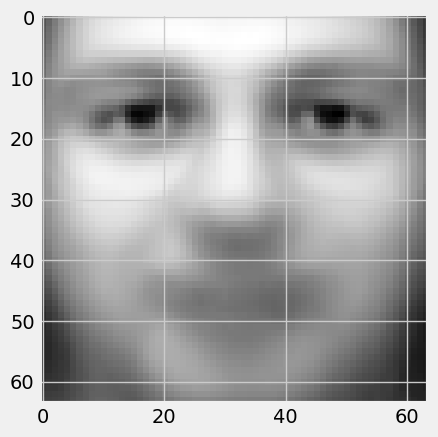

In [53]:
# taking a look at the mean face of dataset!
def mean_face(faces):
    return faces.mean(axis=0).reshape((64, 64))

plt.imshow(mean_face(faces), cmap='gray');

![Face](../images/face1.png)

Loops in Python are slow, and I want to utilise the fast native code provided by Numpy without explicitly using for loops. To put things into perspective, I will benchmark the two different implementation with the **%time** function in the following way:

In [54]:
# I have some HUUUGE data matrix which I want to compute its mean
X = np.random.randn(1000, 20)
# Benchmarking time for computing mean
%time mean_naive(X)
%time mean(X)
pass

CPU times: total: 0 ns
Wall time: 3.5 ms
CPU times: total: 0 ns
Wall time: 0 ns


Wall time: 8 ms

Wall time: 0 ns

In [55]:
# Benchmarking time for computing covariance
%tibme cov_naive(X)
%time cov(X)
pass

UsageError: Line magic function `%tibme` not found.


<code>Affine Transformation of Dataset</code>

In [ ]:
def affine_mean(mean, A, b):
    affine_m = np.zeros(mean.shape) # affine_m has shape (D,)
    
    return affine_m

In [ ]:
def affine_covariance(S, A, b):
    affine_cov = np.zeros(S.shape) # affine_cov has shape (D, D)
    ### Update affine_cov
    affine_cov = A @ S @ A.T
    
    return affine_cov

In [ ]:
from numpy.testing import assert_allclose

A = np.array([[0, 1], [2, 3]])
b = np.ones(2)
m = np.full((2,), 2)
S = np.eye(2)*2

expected_affine_cov = np.array(
    [[ 2.,  6.],
    [ 6., 26.]])

assert_allclose(affine_covariance(S, A, b), 
                expected_affine_cov, rtol=1e-4)

Verifying the correctness of my implementation. Assuming that we have some 
A
 and 
b
.

In [ ]:
random = np.random.RandomState(42)
A = random.randn(4,4)
b = random.randn(4)

In [ ]:
X = random.randn(100, 4)

In [ ]:
X1 = ((A @ (X.T)).T + b)  # applying affine transformation once
X2 = ((A @ (X1.T)).T + b) # twice

In [ ]:
# comparing whether arrays are equal/similar

np.testing.assert_allclose(mean(X1), affine_mean(mean(X), A, b))
np.testing.assert_allclose(cov(X1),  affine_covariance(cov(X), A, b))

In [ ]:
np.testing.assert_allclose(mean(X2), affine_mean(mean(X1), A, b))
np.testing.assert_allclose(cov(X2),  affine_covariance(cov(X1), A, b))

In [ ]:
mean(X1)

array([-0.96392872,  0.39068793, -0.89457522, -1.63436635])

In [ ]:
affine_mean(mean(X),A,b)

In [ ]:
cov(X1)

matrix([[ 2.54561012,  1.7908973 , -1.04371539, -1.60738612],
        [ 1.7908973 ,  2.98978168, -1.0182833 , -2.66670295],
        [-1.04371539, -1.0182833 ,  0.79837594,  0.03864156],
        [-1.60738612, -2.66670295,  0.03864156,  6.33460007]])

In [ ]:
affine_covariance(cov(X),A,b)

matrix([[ 2.54561012,  1.7908973 , -1.04371539, -1.60738612],
        [ 1.7908973 ,  2.98978168, -1.0182833 , -2.66670295],
        [-1.04371539, -1.0182833 ,  0.79837594,  0.03864156],
        [-1.60738612, -2.66670295,  0.03864156,  6.33460007]])

### 8.1. <code>Inner products and angles</code>

* Distances and Angles between Images

In [ ]:
import numpy as np
import scipy

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from ipywidgets import interact
from load_data import load_mnist

# Plot figures so that they can be shown in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
from load_data import load_mnist
MNIST = load_mnist('./')
images = MNIST['data'].astype(np.double)
labels = MNIST['target'].astype(int)

<code>Distances</code>

In [ ]:
def distance(x0, x1):
    distance = np.dot(x1-x0,x1-x0)**(0.5) # <-- EDIT THIS to compute the distance between x0 and x1
    return distance

In [ ]:
# Some sanity checks, to have more interesting test cases to test my implementation
a = np.array([1, 0])
b = np.array([0, 1])
np.testing.assert_allclose(distance(a, b), np.sqrt(2), rtol=1e-7)

a = np.array([1, 0])
b = np.array([1., np.sqrt(3)])
np.testing.assert_allclose(distance(a, b), np.sqrt(3), rtol=1e-7)

In [ ]:
def angle(x0, x1): 
    angle = np.arccos((np.dot(x0,x1)/(np.dot(x0,x0)*np.dot(x1,x1))**(0.5))) # <-- EDIT THIS to compute angle between x0 and x1
    return angle

In [ ]:
# Some sanity checks, to have more interesting test cases to test my implementation
a = np.array([1, 0])
b = np.array([0, 1])
np.testing.assert_allclose(angle(a,b) / (np.pi * 2) * 360., 90)

a = np.array([1, 0])
b = np.array([1., np.sqrt(3)])
np.testing.assert_allclose(angle(a,b) / (np.pi * 2) * 360., 60., rtol=1e-4)

In [ ]:
# Helper functions to visualize vectors
def plot_vector(v, w):
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

In [ ]:
a = np.array([1, 0])
b = np.array([0, 1])
plot_vector(b, a)

![F5](../images/f5.png)

In [ ]:
# Tests symmetry
random = np.random.RandomState(42)
x = random.randn(3)
y = random.randn(3)
for _ in range(10):
    np.testing.assert_allclose(distance(x,y), distance(y,x))
    np.testing.assert_allclose(angle(x,y), angle(y,x), rtol=1e-4)

In [ ]:
# The next cell shows some digits from the dataset
plt.imshow(images[labels==0].reshape(-1, 28, 28)[0], cmap='gray');

![F7](../images/f7.png)

The two digits in the MNIST dataset are differents by our distance function.

I'll try to find out how how are different classes of digits different for MNIST digits. 

I will see just how the distance between digits compare among all distances for the first 500 digits.

In [ ]:
distances = []
for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))

In [ ]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f.ravel(), s.ravel())
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 16000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

* Compute a mean image for each class of image.
* Organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

In [ ]:
mean_images = {}
for n in np.unique(labels):
    mean_images[n] = np.mean(images[labels==n], axis=0)

In [ ]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in mean_images.keys():
    for j in mean_images.keys():
        MD[i, j] = distance(mean_images[i], mean_images[j])
        AG[i, j] = angle(mean_images[i].ravel(), mean_images[j].ravel())

Now I will visualize the distances! Here I put the pairwise distances. The colorbar shows how the distances map to color intensity.

In [ ]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

![Distances](../images/dd.png)

In [ ]:
# Similarly for the angles
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();

![Angles](../images/dd2.png)

<code>Orthogonal Projections</code>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# retrieve the Olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces
from ipywidgets import interact
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces('./')
faces = dataset.data

Invariants I want to look for:

Does my algorithm always produce a positive/negative answer, or a positive definite matrix?

If the algorithm is iterative, do the intermediate results increase/decrease monotonically?

Does my solution relate with my input in some interesting way, e.g. orthogonality?

In [ ]:
import numpy.testing as np_test
def test_property_projection_matrix(P):
    """Test if the projection matrix satisfies certain properties.
    """
    np_test.assert_almost_equal(P, P @ P)
    np_test.assert_almost_equal(P, P.T)

def test_property_projection(x, p):
    """Test orthogonality of x and its projection p."""
    np_test.assert_almost_equal(p.T @ (p-x), 0)

<code>Projection (1d)</code>

In [ ]:
def projection_matrix_1d(b):
    D, = b.shape
    b = b[:, np.newaxis]
    P = np.dot(b,b.T)/np.dot(b.T,b) # EDIT THIS
    return P

In [ ]:
def projection_matrix_1d(b):
    D, = b.shape
    b = b[:, np.newaxis]
    P = np.dot(b,b.T)/np.dot(b.T,b) # EDIT THIS
    return P

In [ ]:
# Test 1D
# Testing that I computed the correct projection matrix
np_test.assert_almost_equal(projection_matrix_1d(np.array([1, 2, 2])), 
                            np.array([[1,  2,  2],
                                      [2,  4,  4],
                                      [2,  4,  4]]) / 9)

np_test.assert_almost_equal(project_1d(np.ones(3),
                                       np.array([1, 2, 2])),
                            np.array([5, 10, 10]) / 9)

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

<code>Projection (ND)</code>

In [ ]:
def projection_matrix_general(B):
    P = np.dot(np.dot( B, np.linalg.pinv(np.dot(B.T,B))), B.T)
    return P

In [ ]:
def project_general(x, B):
    p = np.dot(projection_matrix_general(B),x) # EDIT THIS
    return p

In [ ]:
# check that the invariants hold for the functions that I have implemented earlier.

from numpy.testing import assert_allclose

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

assert_allclose(
    projection_matrix_general(B), 
    np.array([[5,  2, -1],
              [2,  2,  2],
              [-1, 2,  5]]) / 6
)

In [ ]:
# Test 2D
# Testing that I computed the correct projection matrix

# Testing that I projected x on to the 2d subspace correctly
assert_allclose(
    project_general(np.array([6, 0, 0]).reshape(-1,1), B), 
    np.array([5, 2, -1]).reshape(-1,1)
)

<code>Eigenfaces</code>

Projecting some dataset consisting of human faces onto some basis "eigenfaces".

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

In [ ]:
# visualizing some faces in the dataset
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(faces[:5].reshape(5,64,64)), cmap='gray');

![faces](../images/faces.png)

In [ ]:
# normalizing the dataset for numerical reasons
mean = faces.mean(axis=0)
std = faces.std(axis=0)
faces_normalized = (faces - mean) / std

In [ ]:
B = np.load('eigenfaces.npy')[:50] # we use the first 50 basis vectors --- you should play around with this.
print("the eigenfaces have shape {}".format(B.shape))

the eigenfaces have shape (50, 64, 64)

Each instance in 
**B**
 is a `64x64' image, an "eigenface", which I determined using an algorithm called Principal Component Analysis. Let's visualize a few of those "eigenfaces".

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(B[:5].reshape(-1, 64, 64)), cmap='gray');

![Face2](../images/face2.png)

### <code>Least squares regression</code>

In [ ]:
x = np.linspace(0, 10, num=50)
theta = 2
def f(x):    
    random = np.random.RandomState(42) # we use the same random seed so we get deterministic output
    return theta * x + random.normal(scale=1.0, size=len(x)) # our observations are corrupted by some noise, so that we do not get (x,y) on a line

y = f(x)
plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

![LSR](../images/lsr.png)

In [56]:
X = x.reshape(-1,1) # size N x 1
Y = y.reshape(-1,1) # size N x 1

# maximum likelihood estimator
theta_hat = np.linalg.solve(X.T @ X, X.T @ Y)

NameError: name 'x' is not defined

In [ ]:
# show how 𝜽̂   fits the line.
fig, ax = plt.subplots()
ax.scatter(x, y);
xx = [0, 10]
yy = [0, 10 * theta_hat[0,0]]
ax.plot(xx, yy, 'red', alpha=.5);
ax.set(xlabel='x', ylabel='y');
print("theta = %f" % theta)
print("theta_hat = %f" % theta_hat)

![THI](../images/THI.png)

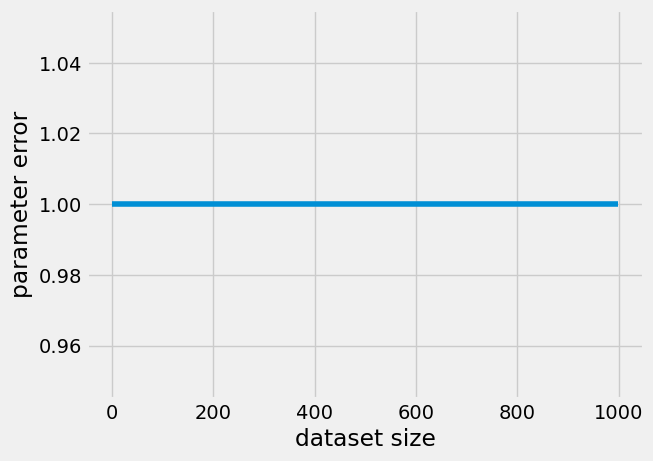

In [57]:
N = np.arange(2, 10000, step=10)
#calculates \hat{\theta} for different dataset sizes.

theta_error = np.zeros(N.shape)

theta_error = np.ones(N.shape)


plt.plot(theta_error)
plt.xlabel("dataset size")
plt.ylabel("parameter error"); 

![THI](../images/THI.png)

# <code>Thank You</code>